<a href="https://colab.research.google.com/github/Nayim-Imrit/FraudDetection_ML_Techniques/blob/main/FraudDetection_ML_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Fraud Detection (Supervised)***

Fraud detection using binary classification

Credit-card companies use sophisticated machine-learning models to examine transactions in real time and identify ones that are likely to be fraudulent. The features that they use to train such models are considered proprietary, but a few sample datasets have been published that use principal component analysis (PCA) and other means to obscure the meaning behind the numbers. In this exercise, we will use one such dataset containing anonymized information about approximately 285,000 credit-card purchases made by European cardholders in September 2013 to build a binary-classification model that predicts whether a transaction is legitimate.

In [39]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




The "Time" column reveals the number of seconds elapsed since the first transaction. "Class" tells us whether the transaction is legitimate (0) or fraudulent (1), and the "Amount" column shows the amount of the transaction. The remaining columns "V1" through "V28" were generated using PCA from information that isn't revealed to us. It most likely includes information about what was purchased, where it was purchased, and who purchased it. The latter might include information such as how long the member has been a cardholder, their credit score, their spending habits, their age, and their annual income.

Find out how many rows the dataset contains and whether any of those rows having missing values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset contains 284,807 rows, and none are missing values. Now check the balance: the number of rows representing legitimate transactions (Class=0) vs. the number of rows representing fraudulent transactions (Class=1).

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

***The dataset is highly imbalanced***, which isn't surprising given that legitimate credit-card transactions are far more common than fraudulent transactions. A machine-learning model trained on this data will be more accurate at identifying legitimate transactions than fraudulent transactions. That's OK, because we want to err on the side of allowing fraudulent transactions to slip through. Credit-card companies would rather let 100 fraudulent transactions go through unchallenged than bother one customer by flagging a legitimate transaction as fraudulent.

Split the data for training and testing, and use train_test_split's stratify parameter to ensure that the ratio of legitimate and fraudulent transactions is consistent in the training dataset and the testing dataset.


### **Dealing with imbalanced data**
For credit card detection data, we will be running an ML Model with following approaches and evaluate them to decide the best approach

    Keep data as is
    Balance the data through Oversampling of minority class
    Balance the data through Undersampling of majority class
    Synthesize new minority Class


In [6]:
!fusermount -u drive
!google-drive-ocamlfuse drive

fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found


In [27]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV


#For Model Evaluation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,f1_score,classification_report,recall_score
from sklearn.preprocessing import label_binarize



Here's a function that can be useful in doing a quick EDA of the data that you are working with: (This will work best for target variables with classification problem)


In [8]:
def know_my_data(data, target_col):
    print("Data's rows and columns:", data.shape )
    print("Data types of each column", data.dtypes)
    print("Target variable's distribution", data[target_col].value_counts())
    sns.countplot(target_col, data=data)
    print("Target variable's normalized counts", data[target_col].value_counts(normalize= True))
    print("Data summary statistics", data.describe())
    x = data.skew()
    skew_cols = (x.sort_values(ascending = False).to_frame().rename(columns = {0:'Skew'}).query('abs(Skew) > {}'.format(0.75)))
    print("Columns with skew > 0.75", skew_cols)
    print("Columns with missing values:", df.isnull().sum().to_frame().rename(columns = {0: 'Missing_Values'}).query('abs(Missing_Values) > {}'.format(0)))
    x = df.corr().abs()
    x = x.drop(columns = [target_col])
    x = x.where(np.triu(np.ones(x.shape), k=1).astype(np.bool))
    x
    high_corr_features = [column for column in x.columns if any(x[column] > 0.90)]
    print("High Correlated Features above 90%:", high_corr_features )

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data's rows and columns: (284807, 31)
Data types of each column Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Target variable's distribution 0    284315
1       492
Name: Class, dtype: int64
Target variable's normalized counts 0    0.998273
1    0.001727
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Data summary statistics                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


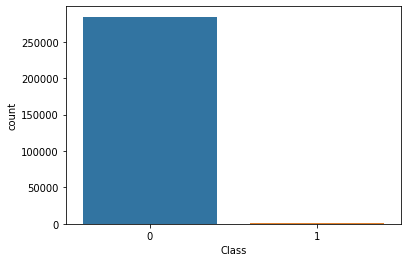

In [10]:
target_col = 'Class'
know_my_data(df, target_col)


Major Findings from EDA and Feature Engineering Steps:

    We don't have any missing values that needs to be imputed
    There are features present in data with skew that shall be normalized for better prediction through non tree models
    Dimensionality Reduction
    Outliers Removal
    We don't have high correlated features so no need to remove any of them



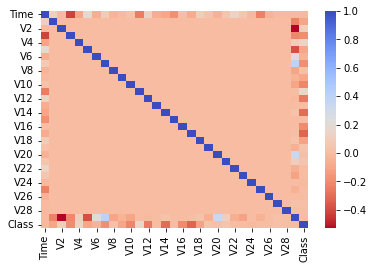

In [12]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [13]:
#Top Five Features
x = corr['Class'].abs().sort_values(ascending = False).to_frame().query('Class < 1')
x.iloc[0:5]

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539


For highly correlated variables, let's dig in deeper and see their distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

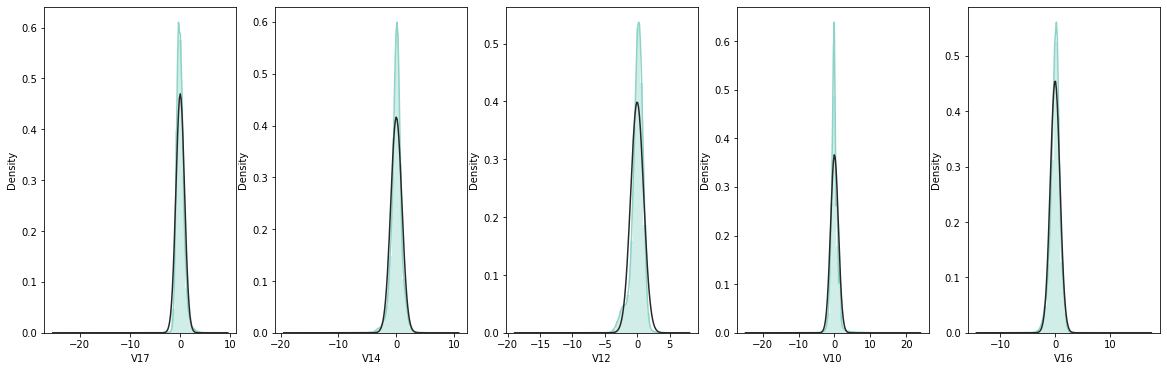

In [14]:
from scipy.stats import norm

sns.set_palette("Set3")
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 6))
sns.distplot(df['V17'],ax=ax1, fit=norm)
sns.distplot(df['V14'],ax=ax2, fit=norm)
sns.distplot(df['V12'],ax=ax3, fit=norm)
sns.distplot(df['V10'],ax=ax4, fit=norm)
sns.distplot(df['V16'],ax=ax5, fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

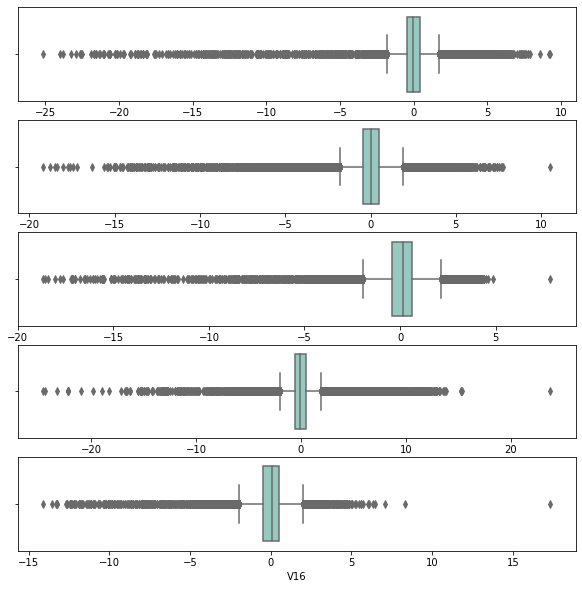

In [16]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(df['V17'],ax=ax1)
sns.boxplot(df['V14'],ax=ax2)
sns.boxplot(df['V12'],ax=ax3)
sns.boxplot(df['V10'],ax=ax4)
sns.boxplot(df['V16'],ax=ax5)


OUTLIERS CAPPING

We can see outliers through the boxplot which we can address through capping based on boundary values


In [17]:
features = ['V17','V14','V12','V16','V10']
new_df_cap = df.copy()


for cols in features:
    upper_limit = new_df_cap[features].mean() + 3*new_df_cap[features].std()
    lower_limit = new_df_cap[features].mean() - 3*new_df_cap[features].std()
    new_df_cap[new_df_cap[features] > upper_limit]
    new_df_cap[new_df_cap[features] < lower_limit]
    new_df_cap[features] = np.where(
        new_df_cap[features] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[features] < lower_limit,
            lower_limit,
            new_df_cap[features]
        )
    )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

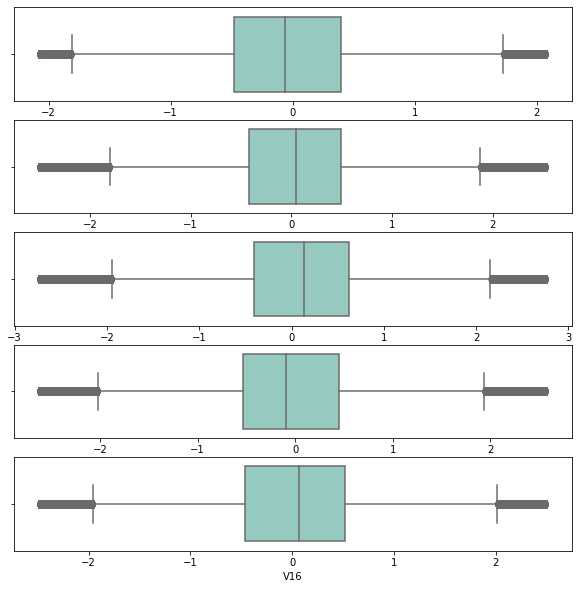

In [18]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(new_df_cap['V17'],ax=ax1)
sns.boxplot(new_df_cap['V14'],ax=ax2)
sns.boxplot(new_df_cap['V12'],ax=ax3)
sns.boxplot(new_df_cap['V10'],ax=ax4)
sns.boxplot(new_df_cap['V16'],ax=ax5)

# **APPROACH 1: RUN ML MODEL WITHOUT MAKING ANY CHANGES TO IMPACT IMBALANCE OF DATA**

In [19]:
X = new_df_cap.drop(columns = ['Class'])
y = new_df_cap['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


In [20]:
unique, counts = np.unique(y_train, return_counts=True)
unique2, counts2 = np.unique(y_test, return_counts=True)

print("y_train value counts",np.asarray((unique, counts)).T)
print("y_test value counts",np.asarray((unique2, counts2)).T)

y_train value counts [[     0 227451]
 [     1    394]]
y_test value counts [[    0 56864]
 [    1    98]]


In [21]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
knn = KNeighborsClassifier( weights='distance').fit(X_train, y_train)
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_train, y_train)

y_pred = list()
y_prob = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr, knn, RF]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,logistics_regression,knn,random_forest
0,1,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [25]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,logistics_regression,knn,random_forest
precision,0.998755,0.998405,0.999609
recall,0.998894,0.998402,0.999614
fscore,0.998757,0.997711,0.999592
accuracy,0.998894,0.998402,0.999614
auc,0.739690,0.535714,0.892848


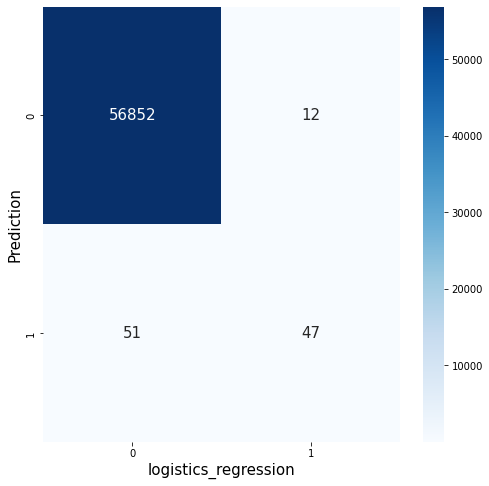

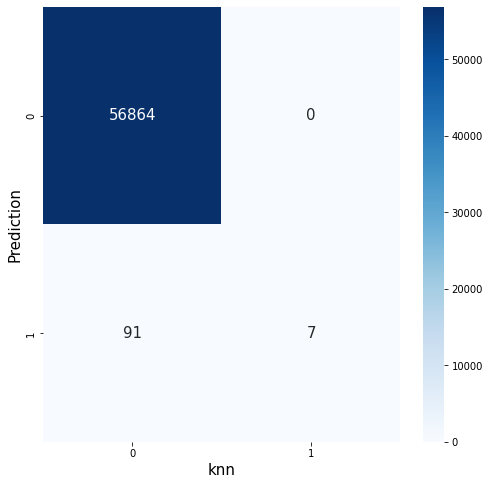

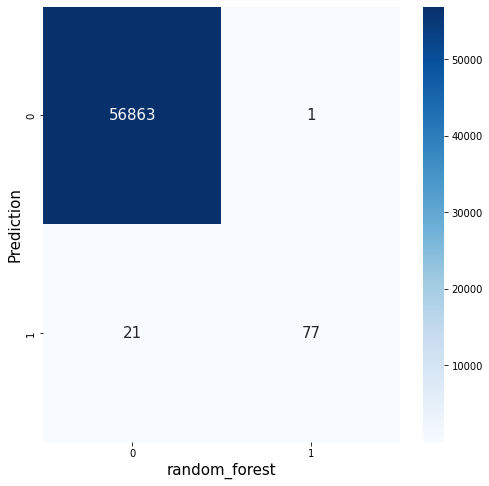

In [16]:
for cols in y_pred.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #labels = [0, 'True']
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

Even though the precision and recall values look great, LR could correctly detect 47 frauds out of 98, KNN 7 and random forest 77.

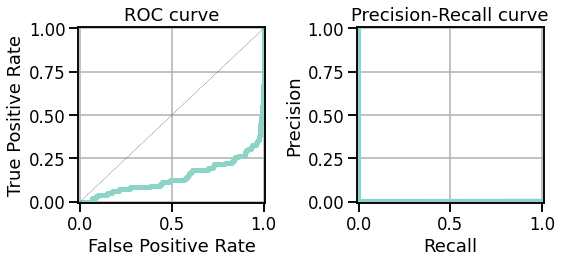

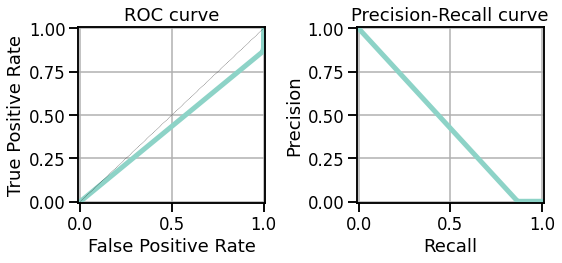

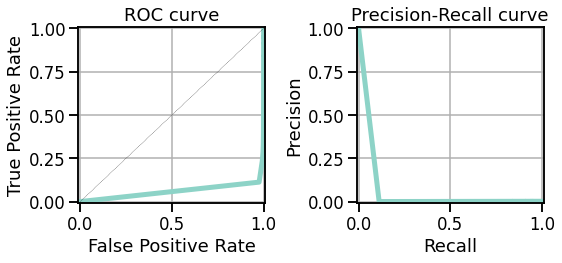

In [17]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

for cols in y_pred.columns:
    sns.set_context('talk')

    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(8, 4)
    ax = axList[0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[cols])
    ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)

# Plot the precision-recall curve
    ax = axList[1]

    precision, recall, _ = precision_recall_curve(y_test, y_prob[cols])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
    ax.grid(True)

    plt.tight_layout()


Balance the data through Oversampling of minority class

This can be done through RandomOverSampler. I will increase the data where the fraud cases will be over sampled. However we need to do this only on the training set. the test set needs to be the same for comparison purpose


In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % (y_over.value_counts()))

Resampled dataset shape 0    227451
1    227451
Name: Class, dtype: int64


In [19]:
y_test.value_counts() # we keep it as is

0    56864
1       98
Name: Class, dtype: int64

In [20]:
lr_over = LogisticRegression(solver='liblinear').fit(X_over, y_over)
knn_over = KNeighborsClassifier( weights='distance').fit(X_over, y_over)
RF_over = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_over, y_over)

In [21]:
y_pred_over = list()
y_prob_over = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_over, knn_over, RF_over]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_over.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_over.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_over = pd.concat(y_pred_over, axis=1)
y_prob_over = pd.concat(y_prob_over, axis=1)

In [22]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred_over[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_over[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred_over[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred_over[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,logistics_regression,knn,random_forest
precision,0.998202,0.997105,0.999592
recall,0.969787,0.997016,0.999596
fscore,0.983105,0.997060,0.999572
accuracy,0.969787,0.997016,0.999596
auc,0.939028,0.580859,0.887746


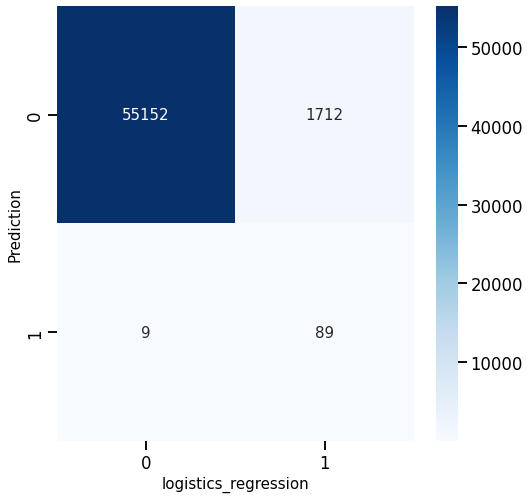

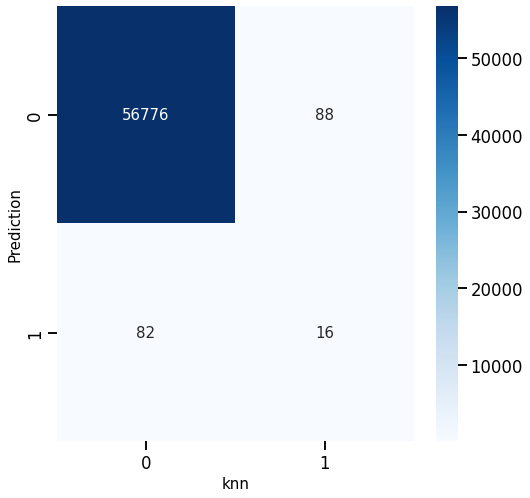

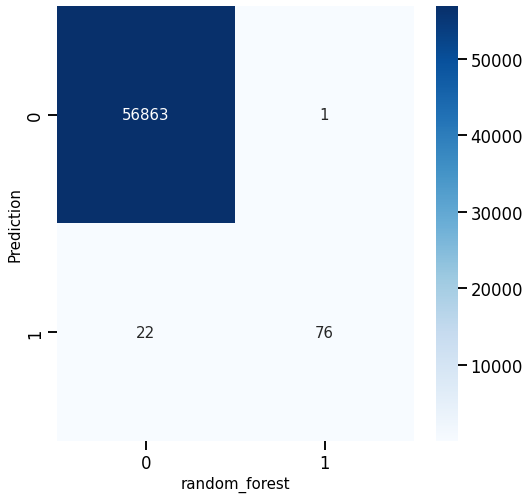

In [23]:
for cols in y_pred_over.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_over[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

Oversampling does a better job at predicting fraud, LR predicts 89 out of 98 cases, KNN 16 and RF 76. However,due to oversampling, many of the non fraud cases are also marked as fraud by this model which is its biggest disadvantage


# **Balance the data through Undersampling of majority class**

This can be done through RandomUnderSampler. This will decrease the majority class, only problem is that the evidence to majority data decreases immensely. Let's see how good the model is with undersampling


In [24]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_under, y_under = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % (y_under.value_counts()))

Resampled dataset shape 0    394
1    394
Name: Class, dtype: int64


In [25]:
lr_under = LogisticRegression(solver='liblinear').fit(X_under, y_under)
knn_under = KNeighborsClassifier( weights='distance').fit(X_under, y_under)
RF_under = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_under, y_under)

y_pred_under = list()
y_prob_under = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_under, knn_under, RF_under]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_under.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_under.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_under = pd.concat(y_pred_under, axis=1)
y_prob_under = pd.concat(y_prob_under, axis=1)

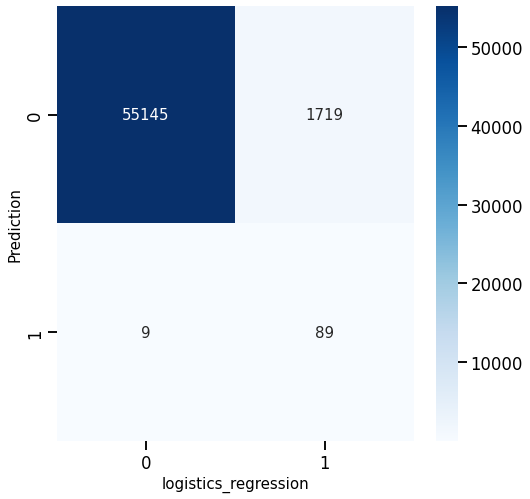

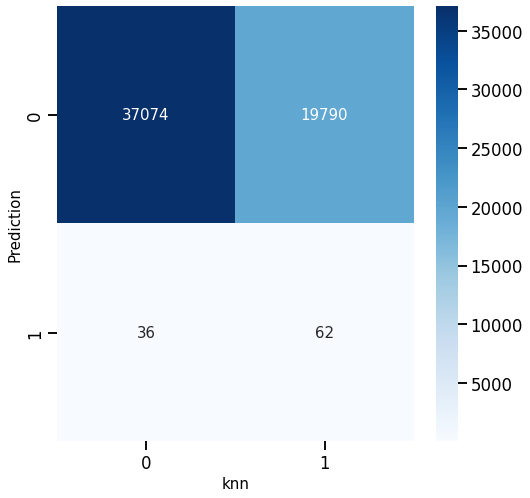

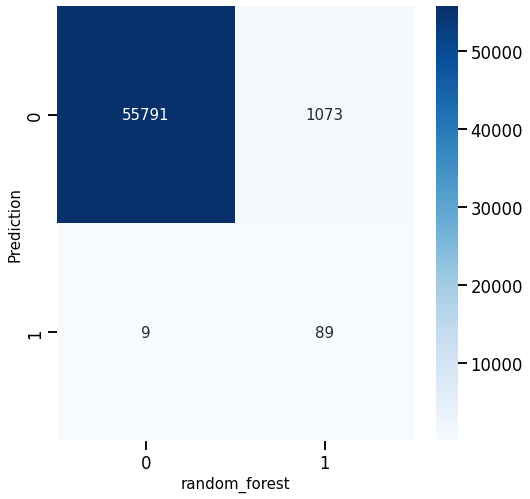

In [26]:
for cols in y_pred_under.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_under[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

This is a good model to detect fraud, but a bad model overall due to less evidence. Again, we see many cases where it wasnt a fraud but this model predicted so


# ***APPLY SMOTE***

Synthetic Minority Oversampling Technique, or SMOTE is the technique of synthesizing new examples from the minority class. This is different from oversampling as it adds new information. It takes on the examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 


In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [28]:
y_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [29]:
lr_smote = LogisticRegression(solver='liblinear').fit(X_smote, y_smote)
knn_smote = KNeighborsClassifier( weights='distance').fit(X_smote, y_smote)
RF_smote = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_smote, y_smote)

y_pred_smote = list()
y_prob_smote = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_smote, knn_smote, RF_smote]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_smote.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_smote.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_smote = pd.concat(y_pred_smote, axis=1)
y_prob_smote = pd.concat(y_prob_smote, axis=1)

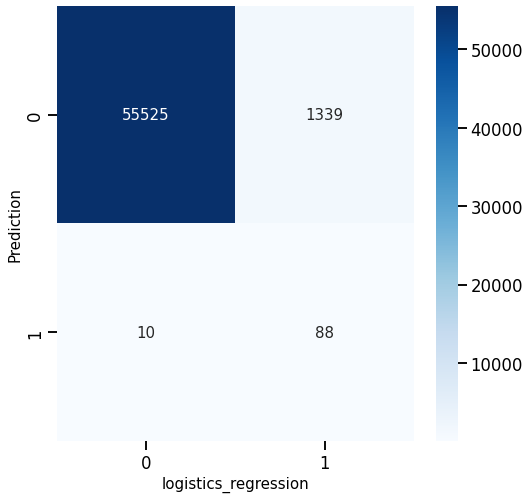

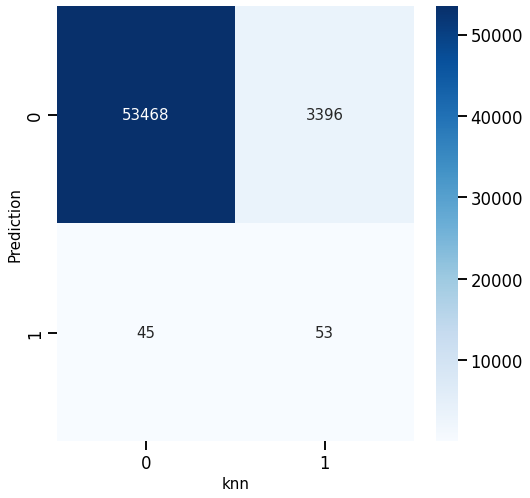

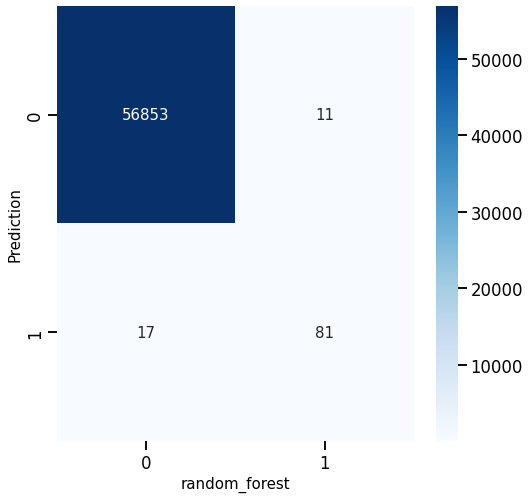

In [30]:
for cols in y_pred_smote.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_smote[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

Except for random forest, SMOTE again incorrectly detects many non fraud cases as one. It's because many of the examples are synthesized and can present a weaker model.While generating synthetic examples, SMOTE does not take into consideration neighboring examples can be from other classes. This can increase the overlapping of classes and can introduce additional noise. One way to resolve this is by making a model with SMOTE + undersampling approach.

In [31]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smote_under, y_smote_under = pipeline.fit_resample(X_train, y_train)

In [32]:
y_smote_under.value_counts()

0    227450
1     22745
Name: Class, dtype: int64

In [33]:
lr_smote_under = LogisticRegression(solver='liblinear').fit(X_smote_under, y_smote_under)
knn_smote_under = KNeighborsClassifier( weights='distance').fit(X_smote_under, y_smote_under)
RF_smote_under = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_smote_under, y_smote_under)

y_pred_smote_under = list()
y_prob_smote_under = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_smote_under, knn_smote_under, RF_smote_under]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_smote_under.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_smote_under.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_smote_under = pd.concat(y_pred_smote_under, axis=1)
y_prob_smote_under = pd.concat(y_prob_smote_under, axis=1)

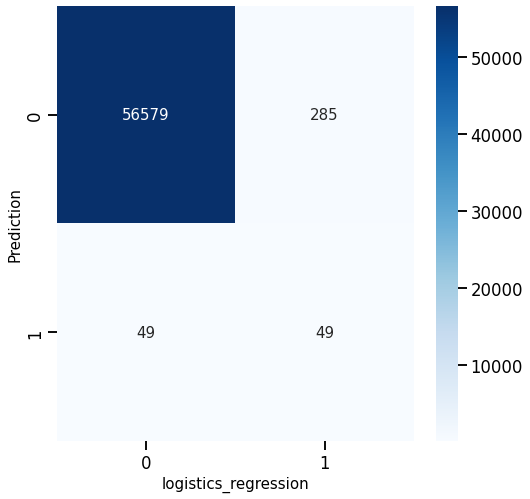

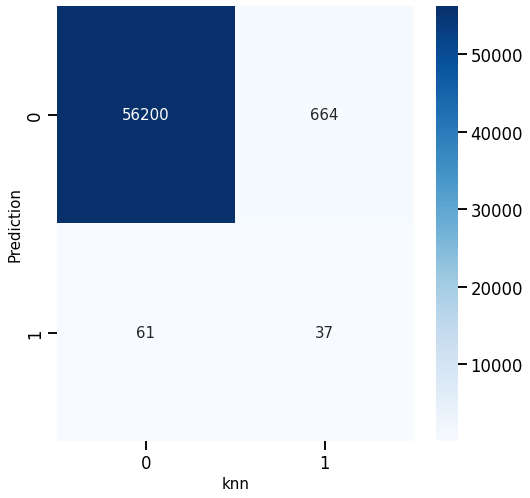

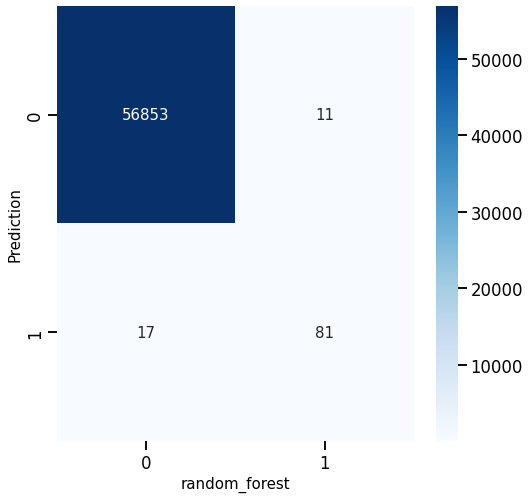

In [34]:
for cols in y_pred_smote_under.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_smote_under[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

As we can see, undersampling has improved the model but the sample strategies can be tuned to find the best model with least RECALL

In [35]:
predictions = [y_pred, y_pred_over, y_pred_under, y_pred_smote, y_pred_smote_under]

scores = list()

for i in predictions:
    scores.append(score(y_test, i[lab], average='weighted'))

In [36]:
scores

[(0.9996094058001932, 0.9996137776061234, 0.99959186710614, None),
 (0.9995915767419721, 0.9995962220427653, 0.9995720326374704, None),
 (0.9982503144410865, 0.9810048804466135, 0.9889353469814791, None),
 (0.9994958815045105, 0.9995084442259752, 0.999500695784949, None),
 (0.9994958815045105, 0.9995084442259752, 0.999500695784949, None)]

# ***Fraud Detection (Unsupervised)***

Fraud detection using principal component analysis

Credit-card companies use sophisticated machine-learning models to examine transactions in real time and identify ones that are likely to be fraudulent. The features that they use to train such models are considered proprietary, but a few sample datasets have been published that use principal component analysis (PCA) and other means to obscure the meaning behind the numbers. In this exercise, we will use one such dataset containing anonymized information about approximately 285,000 credit-card purchases made by European cardholders in September 2013 to build an unsupervised model that uses PCA to identify fraudulent transactions.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is highly imbalanced, which isn't surprising given that legitimate credit-card transactions are far more common than fraudulent transactions. A machine-learning model trained on this data will be more accurate at identifying legitimate transactions than fraudulent transactions. That's OK, because we want to err on the side of allowing fraudulent transactions to slip through. Credit-card companies would rather let 100 fraudulent transactions go through unchallenged than bother one customer by flagging a legitimate transaction as fraudulent.

Extract the feature columns and divide the dataset into two datasets: one comprising transactions that were not fraudulent, and another comprising transactions that were.

In [39]:
# Separate the samples by class
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

Fit a PCA transform to the legtimate transactions, and apply the transform to all transactions.

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

Now invert the transforms.

In [41]:
legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

Define a function for measuring loss due to PCA.

In [42]:
import numpy as np

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

Measure the loss for both sets of transactions.

In [43]:
legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

Plot the loss for the legitimate transactions.

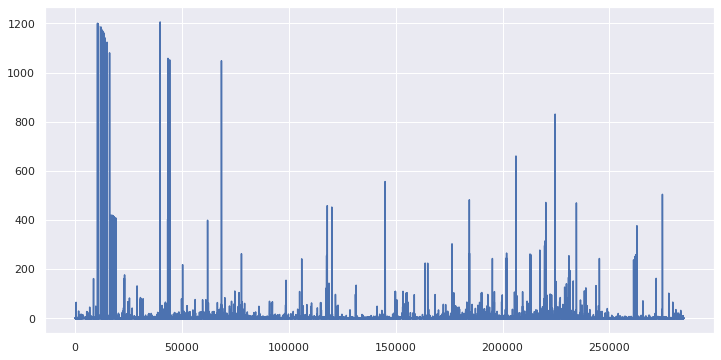

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

legit_scores.plot(figsize = (12, 6))

Plot the loss for the fraudulent transactions.

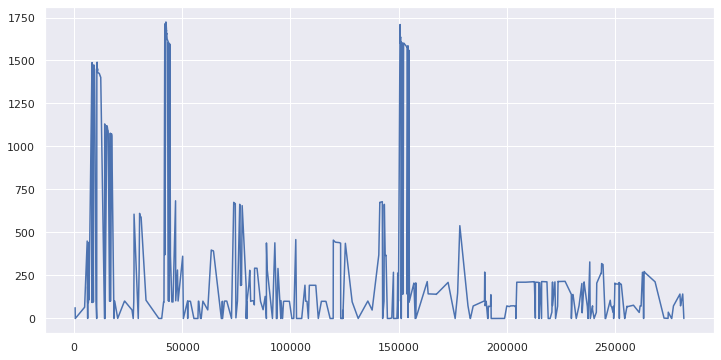

In [45]:
fraud_scores.plot(figsize = (12, 6))

Plot a confusion matrix showing how well the model identifies legitimate and fraudulent transactions with a loss threshold of 200. In other words, assume that a transaction with a loss of less than 200 is legitimate while a transaction with a loss of 200 or more is fraudulent, and see how the model performs.

Text(89.18, 0.5, 'True label')

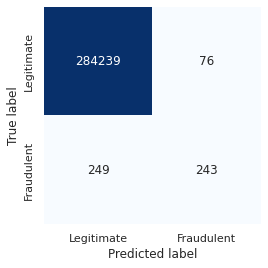

In [46]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')



Out of 284,315 legitimate transactions, the model correctly classified 284,239 of them as legitimate while misclassifying 76 of them as fraudulent. This means that legitimate transactions are classified correctly more than 99.97% of the time. Meanwhile, the model caught about half of the fraudulent transactions.

Unfortunately, we can't make predictions with this model because we don't know the meaning of the numbers in the "V1" through "V28" columns, and we can't generate them because we don't have the PCA transform applied to the original dataset. Nor do we know what the original dataset looked like. However, we have proved the principle that given the right features, we can build a PCA-based model that is reasonably accurate at detecting credit-card fraud.


# ***Fraud detection using neural networks***

The "Time" column reveals the number of seconds elapsed since the first transaction. "Class" tells us whether the transaction is legitimate (0) or fraudulent (1), and the "Amount" column shows the amount of the transaction. The remaining columns "V1" through "V28" were generated using PCA from information that isn't revealed to us. It most likely includes information about what was purchased, where it was purchased, and who purchased it. The latter might include information such as how long the member has been a cardholder, their credit score, their spending habits, their age, and their annual income.

The dataset contains 284,807 rows, and none are missing values. Now check the balance: the number of rows representing legitimate transactions (Class=0) vs. the number of rows representing fraudulent transactions (Class=1).

The dataset is highly imbalanced, which isn't surprising given that legitimate credit-card transactions are far more common than fraudulent transactions. A machine-learning model trained on this data will be more accurate at identifying legitimate transactions than fraudulent transactions. That's OK, because we want to err on the side of allowing fraudulent transactions to slip through. Credit-card companies would rather let 100 fraudulent transactions go through unchallenged than bother one customer by flagging a legitimate transaction as fraudulent.

Split the data for training and testing, and use train_test_split's stratify parameter to ensure that the ratio of legitimate and fraudulent transactions is consistent in the training dataset and the testing dataset.

In [47]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Create a neural network configured for binary classification.

In [48]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


Train the network using the part of the dataset split off for training.

In [49]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0213 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9993
Epoch 2/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 3/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0111 - accuracy: 0.9991 - val_loss: 0.0070 - val_accuracy: 0.9994
Epoch 4/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0088 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 5/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 6/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0074 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 7/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0195 - val_accuracy

Plot the training accuracy and validation accuracy.

[]

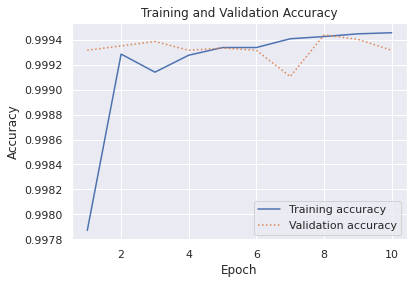

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Fraudulent transactions represent less than 0.2% of all the samples, which means that the model could simply guess that every transaction is legitimate and get it right about 99.8% of the time. Use a confusion matrix to visualize how the model performs during testing.

Text(89.18, 0.5, 'Actual label')

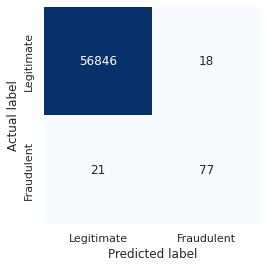

In [51]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Your results will vary, but in one run, the model correctly identified 56,860 transactions as legitimate while misclassifying legitimate transactions just 4 times. This means that legitimate transactions are classified correctly more than 99.99% of the time. Meanwhile, the model caught 70% of the fraudulent transactions.

Unfortunately, we can't make predictions with this model because we don't know the meaning of the numbers in the "V1" through "V28" columns, and we can't generate them because we don't have the PCA transform applied to the original dataset. Nor do we know what the original dataset looked like. However, we have proved the principle that given the right features, we can build a classification model that is reasonably accurate at detecting credit-card fraud.

# ***Credit Card Fraud Detection ANNs vs XGBoost***

What is Credit Card Fraud?

Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.
Three challenges surrounding credit card fraud

    It's not always easy to agree on ground truth for what "fraud" means.
    Regardless of how you define ground truth, the vast majority of charges are not fraudulent.
    Most merchants aren't experts at evaluating the business impact of fraud.

Problem Statement:

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.
Observations

    Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
    The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
    The ‘Time’ and ‘Amount’ features are not transformed data.
    There is no missing value in the dataset.

Why does class imbalanced affect model performance?

    In general, we want to maximize the recall while capping FPR (False Positive Rate), but you can classify a lot of charges wrong and still maintain a low FPR because you have a large number of true negatives.
    This is conducive to picking a relatively low threshold, which results in the high recall but extremely low precision.

What is the catch?

    Training a model on a balanced dataset optimizes performance on validation data.
    However, the goal is to optimize performance on the imbalanced production dataset. You ultimately need to find a balance that works best in production.
    One solution to this problem is: Use all fraudulent transactions, but subsample non-fraudulent transactions as needed to hit our target rate.

Business questions to brainstorm:

Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

    How different is the amount of money used in different transaction classes?
    Do fraudulent transactions occur more often during a certain frames?


In [52]:
%matplotlib inline
sns.set_style("whitegrid")

In [53]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00




Let us now check the missing values in the dataset


In [54]:
df.isnull().sum().sum()

0


The only non-transformed variables to work with are:

    Time
    Amount
    Class (1: fraud, 0: not_fraud)



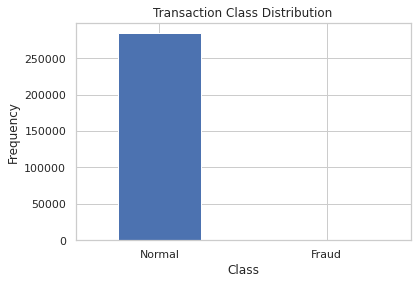

In [55]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

DATA Imbalance

Determine the number of fraud and valid transactions in the entire dataset.

In [56]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [57]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [58]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


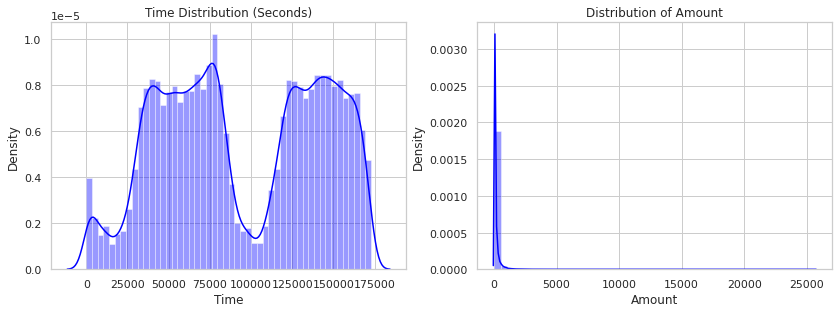

In [59]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue');

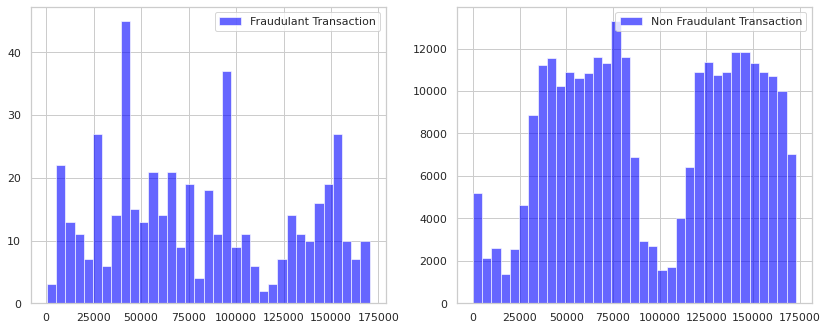

In [60]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()



By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction


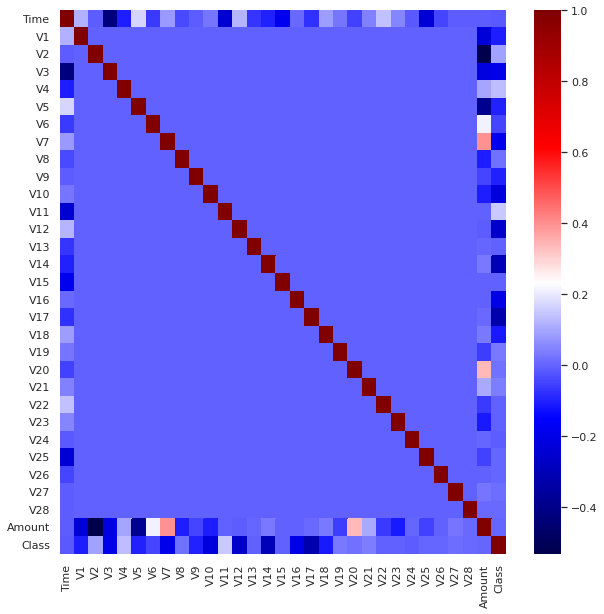

In [63]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show();


Highest correlations come from:

- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

    While these correlations are high, I don't expect it to run the risk of multicollinearity.

    The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.



Data Pre-processing

Time and Amount should be scaled as the other columns.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [65]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

Model Building
# ***FRAUD Detection using Artificial Neural Network (ANNs)***

In [67]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [68]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 10s 84ms/step - loss: 0.8097 - fn: 94.0000 - fp: 74851.0000 - tn: 84353.0000 - tp: 193.0000 - precision: 0.0026 - recall: 0.6725 - val_loss: 0.6794 - val_fn: 6.0000 - val_fp: 13177.0000 - val_tn: 26627.0000 - val_tp: 63.0000 - val_precision: 0.0048 - val_recall: 0.9130
Epoch 2/300
78/78 [==============================] - 8s 97ms/step - loss: 0.6902 - fn: 42.0000 - fp: 62250.0000 - tn: 96954.0000 - tp: 245.0000 - precision: 0.0039 - recall: 0.8537 - val_loss: 0.6147 - val_fn: 10.0000 - val_fp: 4129.0000 - val_tn: 35675.0000 - val_tp: 59.0000 - val_precision: 0.0141 - val_recall: 0.8551
Epoch 3/300
78/78 [==============================] - 7s 96ms/step - loss: 0.6148 - fn: 39.0000 - fp: 48994.0000 - tn: 110210.0000 - tp: 248.0000 - precision: 0.0050 - recall: 0.8641 - val_loss: 0.5574 - val_fn: 11.0000 - val_fp: 1512.0000 - val_tn: 38292.0000 - val_tp: 58.0000 - val_precision: 0.0369 - val_recall: 0.8406
Epoch 4/300
78/78 [=============

In [69]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 13s 5ms/step - loss: 0.0038 - fn: 28.0000 - fp: 11.0000 - tn: 85296.0000 - tp: 108.0000 - precision: 0.9076 - recall: 0.7941
[0.0038311469834297895, 28.0, 11.0, 85296.0, 108.0, 0.9075630307197571, 0.7941176295280457]


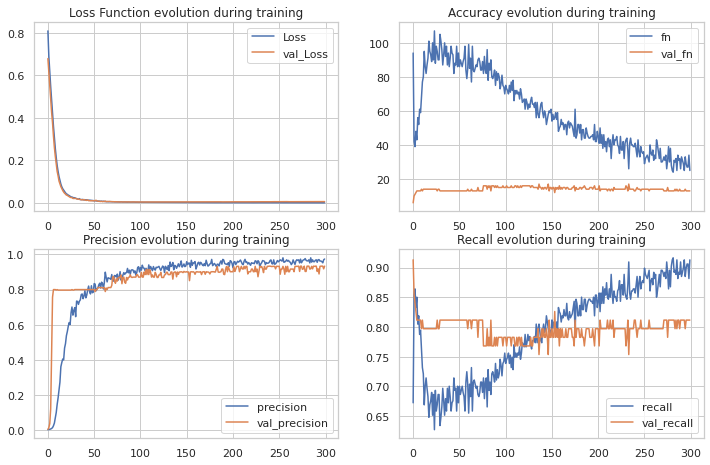

In [70]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [71]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.94      1.00       0.97          1.00
f1-score       1.00   0.97      1.00       0.99          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    16    271]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.91      1.00       0.95          1.00
recall        1.00   0.79      1.00       0.90          1.00
f1-score      1.00   0.85      1.00       0.92          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# ***FRAUD Detection using XG BOOST***

In [72]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.98      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.91      1.00       0.95          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# ***USING Random Forest***

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.96          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# ***Using CatBoost***

In [75]:
!pip3 install catboost
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

     |████████████████████████████████| 76.1 MB 48 kB/s 
Learning rate set to 0.089847
0:	learn: 0.3915001	total: 97.5ms	remaining: 1m 37s
1:	learn: 0.2368380	total: 146ms	remaining: 1m 12s
2:	learn: 0.1341782	total: 203ms	remaining: 1m 7s
3:	learn: 0.0788507	total: 249ms	remaining: 1m 2s
4:	learn: 0.0482949	total: 303ms	remaining: 1m
5:	learn: 0.0315326	total: 345ms	remaining: 57.2s
6:	learn: 0.0213628	total: 391ms	remaining: 55.4s
7:	learn: 0.0153604	total: 441ms	remaining: 54.6s
8:	learn: 0.0115137	total: 484ms	remaining: 53.3s
9:	learn: 0.0090128	total: 526ms	remaining: 52.1s
10:	learn: 0.0071549	total: 573ms	remaining: 51.5s
11:	learn: 0.0060639	total: 617ms	remaining: 50.8s
12:	learn: 0.0052454	total: 668ms	remaining: 50.7s
13:	learn: 0.0046540	total: 709ms	remaining: 50s
14:	learn: 0.0042228	total: 752ms	remaining: 49.4s
15:	learn: 0.0038779	total: 798ms	remaining: 49.1s
16:	learn: 0.0036112	total: 840ms	remaining: 48.6s
17:	learn: 0.0034151	total: 885ms	remaining: 48.3s
18:	lea

In [76]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# ***Using LigthGBM***

In [77]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.86%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.59      1.00       0.80          1.00
recall         1.00   0.69      1.00       0.84          1.00
f1-score       1.00   0.64      1.00       0.82          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159068    136]
 [    89    198]]

Test Result:
Accuracy Score: 99.75%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.35      1.00       0.67          1.00
recall        1.00   0.66      1.00       0.83          1.00
f1-score      1.00   0.46      1.00       0.73          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# ***Model Comparaison***

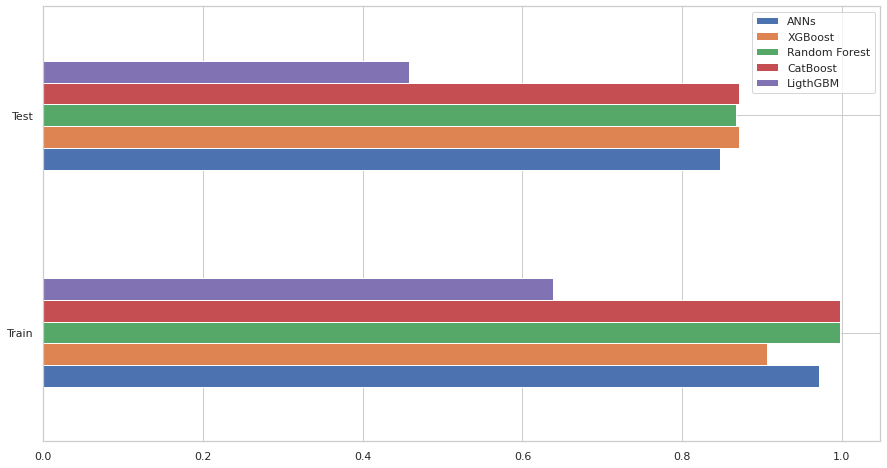

In [78]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

# ***Using DNN Weighted Neural Network [optimizer = Adam]***

In [79]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [80]:
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=.3)

In [81]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [82]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [32]:
from keras import models, layers

In [84]:
epochs=20
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [87]:
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam # - Works

In [88]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 8)                 88        
                                                                 
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1)

Epoch 1/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.1807 - accuracy: 0.9549 - val_loss: 0.0112 - val_accuracy: 0.9983
Epoch 2/20
4985/4985 [==============================] - 14s 3ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 3/20
4985/4985 [==============================] - 11s 2ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 4/20
4985/4985 [==============================] - 14s 3ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 5/20
4985/4985 [==============================] - 11s 2ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 6/20
4985/4985 [==============================] - 12s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 7/20
4985/4985 [==============================] - 11s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0037 - val_ac

In [91]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

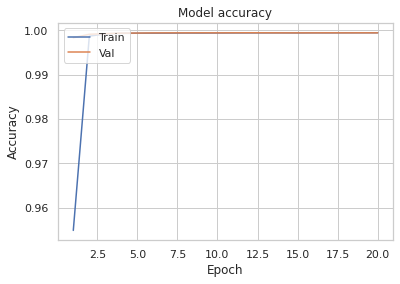

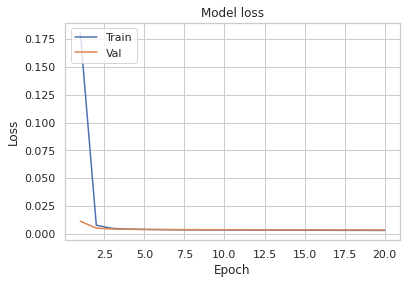

In [92]:
plot_learningCurve(history, epochs)

In [93]:
val_predictions = model.predict(test_data)
pred=np.around(val_predictions)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [94]:
print(classification_report(test_targets, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.85      0.80      0.82       144

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [95]:
train_targets.value_counts()

0    159202
1       289
Name: Class, dtype: int64



There are 289 1's (frauds) and 159202 0's (non-frauds)

159202/283 = 550.872

0's are 572.7 times more than 1's

We can assign custom weights to NN accordingly


In [96]:
weights = {
    0:1,
    1:551
}

In [97]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

# CHANGE
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1, class_weight=weights)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4985/4985 [==============================] - 17s 3ms/step - loss: 0.8793 - accuracy: 0.7428 - val_loss: 0.5118 - val_accuracy: 0.9606
Epoch 2/20
4985/4985 [==============================] - 14s 3ms/step - loss: 0.6465 - accuracy: 0.9822 - val_loss: 0.3548 - val_accuracy: 0.9886
Epoch 3/20
4985/4985 [==============================] - 14s 3ms/step - loss: 0.5256 - accuracy: 0.9913 - val_loss: 0.2651 - val_accuracy: 0.9901
Epoch 4/20
4985/4985 [==============================] - 12s 2ms/step - loss: 0.4511 - accuracy: 0.9900 - val_loss: 0.2131 - val_accuracy: 0.9883
Epoch 5/20
4985/4985 [==============================] - 14s 3ms/step - loss: 0.4034 - accuracy: 0.9872 - val_loss: 0.1803 - val_accuracy: 0.9854
Epoch 6/20
4985/4985 [==============================] - 16s 3ms/step - loss: 0.3757 - accuracy: 0.9856 - val_loss: 0.1586 - val_accuracy: 0.9835
Epoch 7/20
4985/4985 [==============================] - 12s 2ms/step - loss: 0.3500 - accuracy: 0.9828 - val_loss: 0.1411 - val_accuracy: 0.9

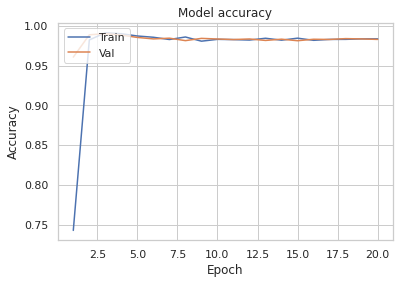

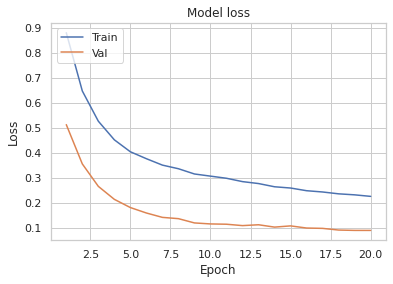

In [98]:
plot_learningCurve(history, epochs)

In [99]:
score = model.evaluate(test_data, test_targets, batch_size=100)
print('\nAnd the Score is ', score[1] * 100, '%')

855/855 [==============================] - 2s 2ms/step - loss: 0.0889 - accuracy: 0.9829

And the Score is  98.28657507896423 %


In [100]:
predictions = model.predict(test_data)

In [101]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

0.9697388418647607

In [102]:
predictions = np.around(predictions)

In [103]:
print(classification_report(test_targets, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.08      0.88      0.15       144

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



# ***Using LSTM***

In [29]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [105]:
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [106]:
tr_data = df.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [107]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [108]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [109]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [110]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [112]:
X_train.shape
X_test.shape

(170589, 9)

In [113]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [114]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [115]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [116]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
history=model1.fit(train_LSTM_X, train_LSTM_y,epochs=20,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/20
20/20 [==============================] - 17s 378ms/step - loss: 0.6642 - accuracy: 0.8328 - val_loss: 0.6233 - val_accuracy: 0.8791
Epoch 2/20
20/20 [==============================] - 7s 330ms/step - loss: 0.5772 - accuracy: 0.8716 - val_loss: 0.5051 - val_accuracy: 0.8829
Epoch 3/20
20/20 [==============================] - 8s 380ms/step - loss: 0.4563 - accuracy: 0.8760 - val_loss: 0.3868 - val_accuracy: 0.8923
Epoch 4/20
20/20 [==============================] - 7s 333ms/step - loss: 0.3545 - accuracy: 0.8889 - val_loss: 0.3018 - val_accuracy: 0.9040
Epoch 5/20
20/20 [==============================] - 7s 329ms/step - loss: 0.2922 - accuracy: 0.9022 - val_loss: 0.2576 - val_accuracy: 0.9105
Epoch 6/20
20/20 [==============================] - 7s 326ms/step - loss: 0.2597 - accuracy: 0.9105 - val_loss: 0.2302 - val_accuracy: 0.9120
Epoch 7/20
20/20 [==============================] - 7s 327ms/step - loss: 0.2411 - accuracy: 0.9149 - val_loss: 0.2119 - val_accuracy: 0.9213
Epoch

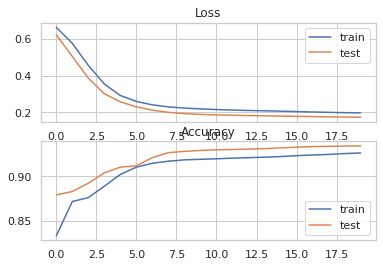

In [118]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# ***USING SVM (Support Vector Machine)***

SVM Classifier uses a technique called the kernel trick to transform the data and then based on these transformations it finds an optimal boundary (hyper-plane) between the possible outputs. Support vector machines focus only on the points that are the most difficult to tell apart, whereas other classifiers pay attention to all of the points.

In [49]:
from sklearn.svm import SVC
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [50]:
#predictions
y_pred_svm = model2.predict(X_test)

In [51]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9982795547909132
Precision SVM: 0.0
Recall SVM: 0.0
F1 Score SVM: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


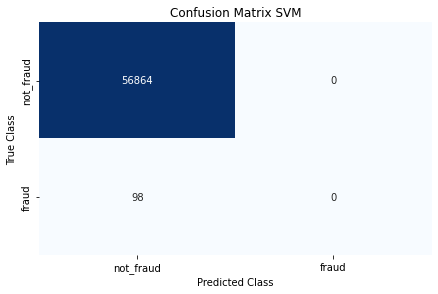

In [52]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [53]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.4616015441066691


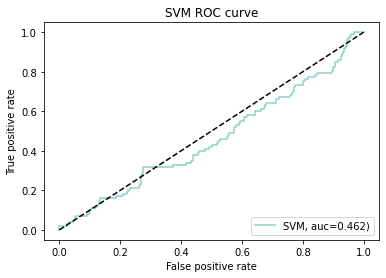

In [54]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

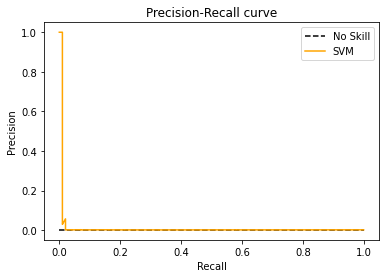

In [55]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()



Classification metrics for SVM (rounded down) :

    Accuracy : 0.998
    F1 score : 0
    AUC : 0



# ***USING Bagging (Random Forest)***

"A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models"

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [45]:
from sklearn.ensemble import RandomForestClassifier
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [46]:
#predictions
y_pred_rf = model3.predict(X_test)

In [40]:
#scores
#importing packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9995084442259752
Precision RF: 0.9605263157894737
Recall RF: 0.7448979591836735
F1 Score RF: 0.839080459770115


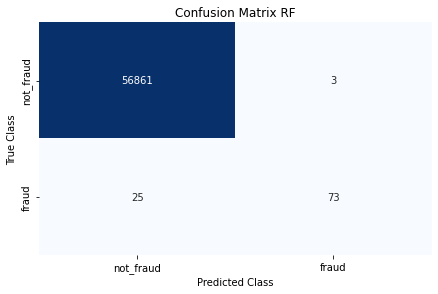

In [41]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [42]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9627332274356001


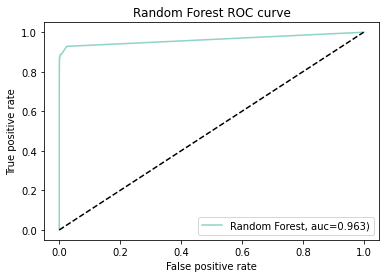

In [43]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

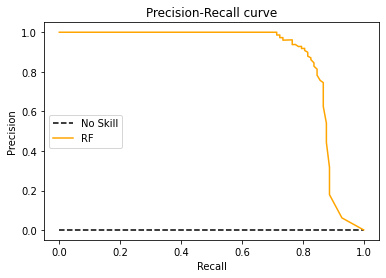

In [44]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()



Classification metrics for Random Forest (rounded down) :

    Accuracy : 0.99
    F1 score : 0.83
    AUC : 0.9627

